# Project Name: Predicting HDB Resale Prices (Part 2)

### Content:
### 4. Modelling
### 5. Results
### 6. Conclusion and Recommendations
### 7. Further Improvements

## 4. Modelling

### Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Train and Test Data CSV

* house_df1 : Train data
* house_df1_test : Test data

In [2]:
#Load dataset
house_df1 = pd.read_csv('datasets/house_df1.csv')

house_df1_test = pd.read_csv('datasets/house_df1_test.csv')

### Check on Train Data CSV

In [3]:
house_df1.head()

,id,floor_area_sqm,resale_price,lower,upper,mid,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,hdb_index,age_tranc,top_20_ps,top_20_ss,town_central,top10_town,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,mrt_name_Admiralty,mrt_name_Aljunied,mrt_name_Ang Mo Kio,mrt_name_Bartley,mrt_name_Beauty World,mrt_name_Bedok,mrt_name_Bedok North,mrt_name_Bedok Reservoir,mrt_name_Bencoolen,mrt_name_Bendemeer,mrt_name_Bishan,mrt_name_Boon Keng,mrt_name_Boon Lay,mrt_name_Botanic Gardens,mrt_name_Braddell,mrt_name_Bras Basah,mrt_name_Buangkok,mrt_name_Bugis,mrt_name_Bukit Batok,mrt_name_Bukit Gombak,mrt_name_Bukit Panjang,mrt_name_Buona Vista,mrt_name_Caldecott,mrt_name_Canberra,mrt_name_Cashew,mrt_name_Changi Airport,mrt_name_Chinatown,mrt_name_Chinese Garden,mrt_name_Choa Chu Kang,mrt_name_Clarke Quay,mrt_name_Clementi,mrt_name_Commonwealth,mrt_name_Dakota,mrt_name_Dover,mrt_name_Eunos,mrt_name_Farrer Park,mrt_name_Farrer Road,mrt_name_Geylang Bahru,mrt_name_HarbourFront,mrt_name_Hillview,mrt_name_Holland Village,mrt_name_Hougang,mrt_name_Jalan Besar,mrt_name_Jurong East,mrt_name_Kaki Bukit,mrt_name_Kallang,mrt_name_Kembangan,mrt_name_Khatib,mrt_name_Kovan,mrt_name_Labrador Park,mrt_name_Lakeside,mrt_name_Lavender,mrt_name_Little India,mrt_name_Lorong Chuan,mrt_name_MacPherson,mrt_name_Marsiling,mrt_name_Marymount,mrt_name_Mattar,mrt_name_Mountbatten,mrt_name_Nicoll Highway,mrt_name_Novena,mrt_name_Outram Park,mrt_name_Pasir Ris,mrt_name_Paya Lebar,mrt_name_Pioneer,mrt_name_Potong Pasir,mrt_name_Punggol,mrt_name_Queenstown,mrt_name_Redhill,mrt_name_Rochor,mrt_name_Sembawang,mrt_name_Sengkang,mrt_name_Serangoon,mrt_name_Simei,mrt_name_Tai Seng,mrt_name_Tampines,mrt_name_Tampines East,mrt_name_Tampines West,mrt_name_Tan Kah Kee,mrt_name_Tanah Merah,mrt_name_Tanjong Pagar,mrt_name_Telok Blangah,mrt_name_Tiong Bahru,mrt_name_Toa Payoh,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
0,88471,90.0,680000.0,10,12,11,25,0,0,0,0,142,1094.090418,154.753357,84,60,330.083069,0,0,29.427395,1138.633422,78,1,1138.633422,224,0,134.7,10,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
house_df1.columns.array

<PandasArray>
[                      'id',           'floor_area_sqm',
             'resale_price',                    'lower',
                    'upper',                      'mid',
            'max_floor_lvl',               'commercial',
            'market_hawker',      'multistorey_carpark',
 ...
             'mrt_name_Ubi',    'mrt_name_Upper Changi',
       'mrt_name_Woodlands', 'mrt_name_Woodlands North',
 'mrt_name_Woodlands South',       'mrt_name_Woodleigh',
         'mrt_name_Yew Tee',    'mrt_name_Yio Chu Kang',
          'mrt_name_Yishun',       'mrt_name_one-north']
Length: 179, dtype: object

### Check on Test Data CSV

In [5]:
house_df1_test.head()

,id,floor_area_sqm,lower,upper,mid,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,hdb_index,age_tranc,top_20_ps,top_20_ss,town_central,top10_town,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,mrt_name_Admiralty,mrt_name_Aljunied,mrt_name_Ang Mo Kio,mrt_name_Bartley,mrt_name_Beauty World,mrt_name_Bedok,mrt_name_Bedok North,mrt_name_Bedok Reservoir,mrt_name_Bencoolen,mrt_name_Bendemeer,mrt_name_Bishan,mrt_name_Boon Keng,mrt_name_Boon Lay,mrt_name_Botanic Gardens,mrt_name_Braddell,mrt_name_Bras Basah,mrt_name_Buangkok,mrt_name_Bugis,mrt_name_Bukit Batok,mrt_name_Bukit Gombak,mrt_name_Bukit Panjang,mrt_name_Buona Vista,mrt_name_Caldecott,mrt_name_Canberra,mrt_name_Cashew,mrt_name_Changi Airport,mrt_name_Chinatown,mrt_name_Chinese Garden,mrt_name_Choa Chu Kang,mrt_name_Clarke Quay,mrt_name_Clementi,mrt_name_Commonwealth,mrt_name_Dakota,mrt_name_Dover,mrt_name_Eunos,mrt_name_Farrer Park,mrt_name_Farrer Road,mrt_name_Geylang Bahru,mrt_name_HarbourFront,mrt_name_Hillview,mrt_name_Holland Village,mrt_name_Hougang,mrt_name_Jalan Besar,mrt_name_Jurong East,mrt_name_Kaki Bukit,mrt_name_Kallang,mrt_name_Kembangan,mrt_name_Khatib,mrt_name_Kovan,mrt_name_Labrador Park,mrt_name_Lakeside,mrt_name_Lavender,mrt_name_Little India,mrt_name_Lorong Chuan,mrt_name_MacPherson,mrt_name_Marsiling,mrt_name_Marymount,mrt_name_Mattar,mrt_name_Mountbatten,mrt_name_Nicoll Highway,mrt_name_Novena,mrt_name_Outram Park,mrt_name_Pasir Ris,mrt_name_Paya Lebar,mrt_name_Pioneer,mrt_name_Potong Pasir,mrt_name_Punggol,mrt_name_Queenstown,mrt_name_Redhill,mrt_name_Rochor,mrt_name_Sembawang,mrt_name_Sengkang,mrt_name_Serangoon,mrt_name_Simei,mrt_name_Tai Seng,mrt_name_Tampines,mrt_name_Tampines East,mrt_name_Tampines West,mrt_name_Tan Kah Kee,mrt_name_Tanah Merah,mrt_name_Tanjong Pagar,mrt_name_Telok Blangah,mrt_name_Tiong Bahru,mrt_name_Toa Payoh,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
0,114982,84.0,7,9,8,12,1,0,0,0,132,619.459242,687.576779,56,123,686.660434,0,0,75.683952,426.467910,92,0,156.322353,218,0,146.7,25,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [6]:
house_df1_test.columns.array

<PandasArray>
[                      'id',           'floor_area_sqm',
                    'lower',                    'upper',
                      'mid',            'max_floor_lvl',
               'commercial',            'market_hawker',
      'multistorey_carpark',        'precinct_pavilion',
 ...
             'mrt_name_Ubi',    'mrt_name_Upper Changi',
       'mrt_name_Woodlands', 'mrt_name_Woodlands North',
 'mrt_name_Woodlands South',       'mrt_name_Woodleigh',
         'mrt_name_Yew Tee',    'mrt_name_Yio Chu Kang',
          'mrt_name_Yishun',       'mrt_name_one-north']
Length: 178, dtype: object

### Check Rows and Columns


In [7]:
#Check rows and columns
print(f"Shape for train dataset; {house_df1.shape}")
print(f"Shape for test dataset; {house_df1_test.shape}")

Shape for train dataset; (150634, 179)
Shape for test dataset; (16737, 178)


### Check Train CSV Data Basic Stats

In [8]:
#Check basic stats
house_df1.describe(include='all')

,id,floor_area_sqm,resale_price,lower,upper,mid,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,hdb_index,age_tranc,top_20_ps,top_20_ss,town_central,top10_town,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,mrt_name_Admiralty,mrt_name_Aljunied,mrt_name_Ang Mo Kio,mrt_name_Bartley,mrt_name_Beauty World,mrt_name_Bedok,mrt_name_Bedok North,mrt_name_Bedok Reservoir,mrt_name_Bencoolen,mrt_name_Bendemeer,mrt_name_Bishan,mrt_name_Boon Keng,mrt_name_Boon Lay,mrt_name_Botanic Gardens,mrt_name_Braddell,mrt_name_Bras Basah,mrt_name_Buangkok,mrt_name_Bugis,mrt_name_Bukit Batok,mrt_name_Bukit Gombak,mrt_name_Bukit Panjang,mrt_name_Buona Vista,mrt_name_Caldecott,mrt_name_Canberra,mrt_name_Cashew,mrt_name_Changi Airport,mrt_name_Chinatown,mrt_name_Chinese Garden,mrt_name_Choa Chu Kang,mrt_name_Clarke Quay,mrt_name_Clementi,mrt_name_Commonwealth,mrt_name_Dakota,mrt_name_Dover,mrt_name_Eunos,mrt_name_Farrer Park,mrt_name_Farrer Road,mrt_name_Geylang Bahru,mrt_name_HarbourFront,mrt_name_Hillview,mrt_name_Holland Village,mrt_name_Hougang,mrt_name_Jalan Besar,mrt_name_Jurong East,mrt_name_Kaki Bukit,mrt_name_Kallang,mrt_name_Kembangan,mrt_name_Khatib,mrt_name_Kovan,mrt_name_Labrador Park,mrt_name_Lakeside,mrt_name_Lavender,mrt_name_Little India,mrt_name_Lorong Chuan,mrt_name_MacPherson,mrt_name_Marsiling,mrt_name_Marymount,mrt_name_Mattar,mrt_name_Mountbatten,mrt_name_Nicoll Highway,mrt_name_Novena,mrt_name_Outram Park,mrt_name_Pasir Ris,mrt_name_Paya Lebar,mrt_name_Pioneer,mrt_name_Potong Pasir,mrt_name_Punggol,mrt_name_Queenstown,mrt_name_Redhill,mrt_name_Rochor,mrt_name_Sembawang,mrt_name_Sengkang,mrt_name_Serangoon,mrt_name_Simei,mrt_name_Tai Seng,mrt_name_Tampines,mrt_name_Tampines East,mrt_name_Tampines West,mrt_name_Tan Kah Kee,mrt_name_Tanah Merah,mrt_name_Tanjong Pagar,mrt_name_Telok Blangah,mrt_name_Tiong Bahru,mrt_name_Toa Payoh,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
count,150634.000000,150634.00000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.00000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,15063

### Check Test CSV Data Basic Stats

In [9]:
#Check basic stats
house_df1_test.describe(include='all')

,id,floor_area_sqm,lower,upper,mid,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,hdb_index,age_tranc,top_20_ps,top_20_ss,town_central,top10_town,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,mrt_name_Admiralty,mrt_name_Aljunied,mrt_name_Ang Mo Kio,mrt_name_Bartley,mrt_name_Beauty World,mrt_name_Bedok,mrt_name_Bedok North,mrt_name_Bedok Reservoir,mrt_name_Bencoolen,mrt_name_Bendemeer,mrt_name_Bishan,mrt_name_Boon Keng,mrt_name_Boon Lay,mrt_name_Botanic Gardens,mrt_name_Braddell,mrt_name_Bras Basah,mrt_name_Buangkok,mrt_name_Bugis,mrt_name_Bukit Batok,mrt_name_Bukit Gombak,mrt_name_Bukit Panjang,mrt_name_Buona Vista,mrt_name_Caldecott,mrt_name_Canberra,mrt_name_Cashew,mrt_name_Changi Airport,mrt_name_Chinatown,mrt_name_Chinese Garden,mrt_name_Choa Chu Kang,mrt_name_Clarke Quay,mrt_name_Clementi,mrt_name_Commonwealth,mrt_name_Dakota,mrt_name_Dover,mrt_name_Eunos,mrt_name_Farrer Park,mrt_name_Farrer Road,mrt_name_Geylang Bahru,mrt_name_HarbourFront,mrt_name_Hillview,mrt_name_Holland Village,mrt_name_Hougang,mrt_name_Jalan Besar,mrt_name_Jurong East,mrt_name_Kaki Bukit,mrt_name_Kallang,mrt_name_Kembangan,mrt_name_Khatib,mrt_name_Kovan,mrt_name_Labrador Park,mrt_name_Lakeside,mrt_name_Lavender,mrt_name_Little India,mrt_name_Lorong Chuan,mrt_name_MacPherson,mrt_name_Marsiling,mrt_name_Marymount,mrt_name_Mattar,mrt_name_Mountbatten,mrt_name_Nicoll Highway,mrt_name_Novena,mrt_name_Outram Park,mrt_name_Pasir Ris,mrt_name_Paya Lebar,mrt_name_Pioneer,mrt_name_Potong Pasir,mrt_name_Punggol,mrt_name_Queenstown,mrt_name_Redhill,mrt_name_Rochor,mrt_name_Sembawang,mrt_name_Sengkang,mrt_name_Serangoon,mrt_name_Simei,mrt_name_Tai Seng,mrt_name_Tampines,mrt_name_Tampines East,mrt_name_Tampines West,mrt_name_Tan Kah Kee,mrt_name_Tanah Merah,mrt_name_Tanjong Pagar,mrt_name_Telok Blangah,mrt_name_Tiong Bahru,mrt_name_Toa Payoh,mrt_name_Ubi,mrt_name_Upper Changi,mrt_name_Woodlands,mrt_name_Woodlands North,mrt_name_Woodlands South,mrt_name_Woodleigh,mrt_name_Yew Tee,mrt_name_Yio Chu Kang,mrt_name_Yishun,mrt_name_one-north
count,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.0,16737.00000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,1673

### Check Duplicates

In [10]:
#Check duplicates
#By using ‘last’, the last occurrence of each set of duplicated values is set on False and all others on True.
house_df1_duplicates = house_df1.duplicated().sum()
house_df1_test_duplicates = house_df1_test.duplicated().sum()

print(f'Total number of duplicated rows for Train dataset : {house_df1_duplicates}')
print(f'Total number of duplicated rows for Test dataset : {house_df1_test_duplicates}')

Total number of duplicated rows for Train dataset : 0
Total number of duplicated rows for Test dataset : 0


### Identify Null Values in Train CSV

In [11]:
def print_null_values(dataset):
    # Calculate null value counts
    null_counts = dataset.isnull().sum()
    
    # Filter columns with null values
    columns_with_null_values = null_counts[null_counts > 0]
    
    # Print columns with null values
    print("Columns with null values:")
    print(columns_with_null_values)

In [12]:
print_null_values(house_df1)

Columns with null values:
Series([], dtype: int64)


### Identify Null Values in Test CSV

In [13]:
print_null_values(house_df1_test)

Columns with null values:
Series([], dtype: int64)


## Preprocessing and Modeling on Train CSV (house_df1)

### Train Test Split

In [14]:
X = house_df1.drop(['id','resale_price'], axis=1)

In [15]:
y = house_df1['resale_price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [17]:
X_train.shape, y_train.shape

((120507, 177), (120507,))

In [18]:
X_test.shape, y_test.shape

((30127, 177), (30127,))

### Baseline Model (Null Model)

In [19]:
y_pred = y_train.mean()

In [20]:
resids = y_test - y_pred

In [21]:
null_mse = np.mean((resids)**2)

In [22]:
null_rmse = (null_mse)**0.5
null_rmse 

142801.32123625302

### Scaling (StandardScaler)

In [23]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Linear Regression model

In [24]:
# Instantiate linear regression model

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [25]:
y_pred =  lr.predict(X_test_sc)

In [26]:
# RMSE
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

lr_rmse

43285.97951645381

In [27]:
# RMSE for Cross Validation

lr_cv_score = - cross_val_score(lr, 
                              X_train_sc, 
                              y_train, 
                              cv = 5,
                                scoring = 'neg_root_mean_squared_error' ).mean()

lr_cv_score

43605.54316069139

In [28]:
# R2 Score for Train data

lr_score_train = lr.score(X_train_sc, y_train)
lr_score_train

0.9079448482729024

In [29]:
# R2 Score for Test data

lr_score_test = lr.score(X_test_sc, y_test)
lr_score_test

0.9081107083313685

In [30]:
#Look at the coefficients for variables in the lr model.
#Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.

lr_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lr.coef_,
                            'abs_coef':np.abs(lr.coef_)})

lr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lr_coefs.head(20)

,variable,coef,abs_coef
63,flat_model_Model A,1.265694e+17,1.265694e+17
60,flat_model_Improved,1.195896e+17,1.195896e+17
38,town_CHOA CHU KANG,-1.033056e+17,1.033056e+17
67,flat_model_New Generation,9.935747e+16,9.935747e+16
35,town_BUKIT PANJANG,-9.794803e+16,9.794803e+16
49,town_SEMBAWANG,-8.273767e+16,8.273767e+16
68,flat_model_Premium Apartment,8.242169e+16,8.242169e+16
43,town_JURONG WEST,-8.234244e+16,8.234244e+16
159,mrt_name_Tampines East,-7.570534e+16,7.570534e+16
145,mrt_name_Pasir Ris,-7.067604e+16,7.067604e+16


### Check on the number of features remaining after Linear Regression modeling

In [31]:
filtered_lr_coefs = lr_coefs[lr_coefs['abs_coef'] > 0]
filtered_lr_coefs.count()

variable    177
coef        177
abs_coef    177
dtype: int64

### Top features that are positively correlated with sale price ( Linear Regression)

In [32]:
lr_coefs[abs(lr_coefs['coef']) > 0].sort_values(by = 'coef', ascending=False).head(10)

,variable,coef,abs_coef
63,flat_model_Model A,1.265694e+17,1.265694e+17
60,flat_model_Improved,1.195896e+17,1.195896e+17
67,flat_model_New Generation,9.935747e+16,9.935747e+16
68,flat_model_Premium Apartment,8.242169e+16,8.242169e+16
52,town_TAMPINES,6.577540e+16,6.577540e+16
71,flat_model_Simplified,5.870013e+16,5.870013e+16
58,flat_model_Apartment,5.404329e+16,5.404329e+16
79,flat_type_4 ROOM,5.096044e+16,5.096044e+16
103,mrt_name_Bukit Panjang,4.956060e+16,4.956060e+16
72,flat_model_Standard,4.860958e+16,4.860958e+16


### Top features that are negatively correlated with sale price ( Linear Regression)

In [33]:
lr_coefs[abs(lr_coefs['coef']) > 0].sort_values(by = 'coef', ascending=True).head(10)

,variable,coef,abs_coef
38,town_CHOA CHU KANG,-1.033056e+17,1.033056e+17
35,town_BUKIT PANJANG,-9.794803e+16,9.794803e+16
49,town_SEMBAWANG,-8.273767e+16,8.273767e+16
43,town_JURONG WEST,-8.234244e+16,8.234244e+16
159,mrt_name_Tampines East,-7.570534e+16,7.570534e+16
145,mrt_name_Pasir Ris,-7.067604e+16,7.067604e+16
158,mrt_name_Tampines,-6.036293e+16,6.036293e+16
160,mrt_name_Tampines West,-5.796431e+16,5.796431e+16
29,top10_town,-4.787713e+16,4.787713e+16
41,town_HOUGANG,-4.784491e+16,4.784491e+16


### Ridge Model

In [34]:
# Using Ridge cv to find optimal alpha

ridge_alphas = np.logspace(0, 5, 200)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   cv=10)

ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10)

In [35]:
ridge_optimal_alpha = ridge_cv.alpha_

In [36]:
# Instantiate Ridge model

ridge = Ridge(alpha = ridge_optimal_alpha)

In [37]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=1.4992684327860457)

In [38]:
y_pred =  ridge.predict(X_test_sc)

In [39]:
# RMSE Ridge
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

ridge_rmse

43262.212416955226

In [40]:
# RMSE Ridge Cross Validation
ridge_cv_score = - cross_val_score(ridge, 
                                 X_train_sc,
                                 y_train, 
                                 cv = 5,
                                scoring = 'neg_root_mean_squared_error' ).mean()

ridge_cv_score

43591.53308094734

In [41]:
# R2 Score Ridge Train data

ridge_score_train = ridge.score(X_train_sc, y_train)
ridge_score_train

0.9079951499229817

In [42]:
# R2 Score Ridge Test data

ridge_score_test = ridge.score(X_test_sc, y_test)
ridge_score_test

0.9082115882186738

In [43]:
#Look at the coefficients for variables in the ridge model.
#Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(20)

,variable,coef,abs_coef
0,floor_area_sqm,77176.707880,77176.707880
25,age_tranc,-47285.072076,47285.072076
31,town_BEDOK,33596.043631,33596.043631
165,mrt_name_Tiong Bahru,25837.030860,25837.030860
14,mrt_nearest_distance,-24247.669969,24247.669969
45,town_MARINE PARADE,19202.143764,19202.143764
4,max_floor_lvl,18289.638708,18289.638708
1,lower,17485.244120,17485.244120
90,mrt_name_Bedok Reservoir,-15734.840531,15734.840531
32,town_BISHAN,15706.914495,15706.914495


### Check on the number of features remaining after Ridge modeling

In [44]:
filtered_ridge_coefs = ridge_coefs[ridge_coefs['abs_coef'] > 0]
filtered_ridge_coefs.count()

variable    177
coef        177
abs_coef    177
dtype: int64

After ridge modeling, there are still **177 features** left. This means that no features coefficient were penalized to 0.

### Top features that are positively correlated with sale price (Ridge modeling)

In [45]:
ridge_coefs[abs(ridge_coefs['coef']) > 0].sort_values(by = 'coef', ascending=False).head(10)

,variable,coef,abs_coef
0,floor_area_sqm,77176.707880,77176.707880
31,town_BEDOK,33596.043631,33596.043631
165,mrt_name_Tiong Bahru,25837.030860,25837.030860
45,town_MARINE PARADE,19202.143764,19202.143764
4,max_floor_lvl,18289.638708,18289.638708
1,lower,17485.244120,17485.244120
32,town_BISHAN,15706.914495,15706.914495
24,hdb_index,15234.269039,15234.269039
151,mrt_name_Redhill,14362.998832,14362.998832
113,mrt_name_Clementi,13471.357356,13471.357356


### Top features that are negatively correlated with sale price (Ridge modeling)

In [46]:
ridge_coefs[abs(ridge_coefs['coef']) > 0].sort_values(by = 'coef', ascending=True).head(10)

,variable,coef,abs_coef
25,age_tranc,-47285.072076,47285.072076
14,mrt_nearest_distance,-24247.669969,24247.669969
90,mrt_name_Bedok Reservoir,-15734.840531,15734.840531
33,town_BUKIT BATOK,-15536.725747,15536.725747
127,mrt_name_Kaki Bukit,-13927.665294,13927.665294
54,town_WOODLANDS,-13397.833860,13397.833860
89,mrt_name_Bedok North,-13131.280618,13131.280618
83,mrt_name_Admiralty,-13076.656204,13076.656204
34,town_BUKIT MERAH,-13000.414469,13000.414469
88,mrt_name_Bedok,-11783.165003,11783.165003


### Features with the greatest magnitude  (Ridge modeling)

In [47]:
# Filter the dataset
ridge_coefs[(ridge_coefs['abs_coef']) > 0].sort_values(by = 'abs_coef', ascending=False).head(10)

,variable,coef,abs_coef
0,floor_area_sqm,77176.707880,77176.707880
25,age_tranc,-47285.072076,47285.072076
31,town_BEDOK,33596.043631,33596.043631
165,mrt_name_Tiong Bahru,25837.030860,25837.030860
14,mrt_nearest_distance,-24247.669969,24247.669969
45,town_MARINE PARADE,19202.143764,19202.143764
4,max_floor_lvl,18289.638708,18289.638708
1,lower,17485.244120,17485.244120
90,mrt_name_Bedok Reservoir,-15734.840531,15734.840531
32,town_BISHAN,15706.914495,15706.914495


### Lasso Model

In [48]:
# Using Lasso cv to find optimal alpha

lasso_cv = LassoCV(n_alphas=100, cv=10)
lasso_cv.fit(X_train_sc, y_train)

LassoCV(cv=10)

In [49]:
lasso_optimal_alpha = lasso_cv.alpha_

In [50]:
lasso_optimal_alpha

93.68396660451329

In [51]:
# Instantiate Lasso model

lasso = Lasso(alpha= lasso_optimal_alpha)

In [52]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=93.68396660451329)

In [53]:
y_pred =  lasso.predict(X_test_sc)

In [54]:
# RMSE for Lasso
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

lasso_rmse

43352.31202984588

In [55]:
# RMSE Lasso Cross Validation

lasso_cv_score = - cross_val_score(lasso, 
                                 X_train_sc, 
                                 y_train, 
                                 cv = 5,
                                scoring = 'neg_root_mean_squared_error' ).mean()

lasso_cv_score

43717.25111721253

In [56]:
# R2 Lasso Train data

lasso_score_train = lasso.score(X_train_sc, y_train)
lasso_score_train

0.9074304428314022

In [57]:
# R2 Lasso Test data

lasso_score_test = lasso.score(X_test_sc, y_test)
lasso_score_test

0.9078288656657743

In [58]:
#Look at the coefficients for variables in the Lasso model.
#Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.


lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
0,floor_area_sqm,79122.614573,79122.614573
25,age_tranc,-46629.856679,46629.856679
28,town_central,30423.859875,30423.859875
14,mrt_nearest_distance,-24293.540470,24293.540470
1,lower,19145.026467,19145.026467
4,max_floor_lvl,18965.813460,18965.813460
24,hdb_index,15200.748883,15200.748883
31,town_BEDOK,14984.173118,14984.173118
39,town_CLEMENTI,14573.402381,14573.402381
49,town_SEMBAWANG,-13783.635147,13783.635147


### Check on the number of features remaining after Lasso modeling

In [59]:
filtered_lasso_coefs = lasso_coefs[lasso_coefs['abs_coef'] > 0]
filtered_lasso_coefs.count()

variable    142
coef        142
abs_coef    142
dtype: int64

After lasso modeling, there are **142 features** left. This means that lasso model penalized 35 features' coefficients to 0.

### Top features that are positively correlated with sale price (Lasso modeling)

In [60]:
lasso_coefs[(lasso_coefs['abs_coef']) > 0].sort_values(by = 'coef', ascending=False).head(10)

,variable,coef,abs_coef
0,floor_area_sqm,79122.614573,79122.614573
28,town_central,30423.859875,30423.859875
1,lower,19145.026467,19145.026467
4,max_floor_lvl,18965.813460,18965.813460
24,hdb_index,15200.748883,15200.748883
31,town_BEDOK,14984.173118,14984.173118
39,town_CLEMENTI,14573.402381,14573.402381
45,town_MARINE PARADE,11421.285177,11421.285177
30,town_ANG MO KIO,10751.711120,10751.711120
36,town_BUKIT TIMAH,10711.010169,10711.010169


### Top features that are negatively correlated with sale price (Lasso modeling)

In [61]:
lasso_coefs[(lasso_coefs['abs_coef']) > 0].sort_values(by = 'coef', ascending=True).head(10)

,variable,coef,abs_coef
25,age_tranc,-46629.856679,46629.856679
14,mrt_nearest_distance,-24293.540470,24293.540470
49,town_SEMBAWANG,-13783.635147,13783.635147
54,town_WOODLANDS,-12764.599383,12764.599383
38,town_CHOA CHU KANG,-10072.717586,10072.717586
35,town_BUKIT PANJANG,-9704.278980,9704.278980
83,mrt_name_Admiralty,-9340.701581,9340.701581
11,hawker_nearest_distance,-9145.038052,9145.038052
147,mrt_name_Pioneer,-8727.342369,8727.342369
78,flat_type_3 ROOM,-7417.452908,7417.452908


In [62]:
# talk about how the features that impact the sale price

### Features with the greatest magnitude (Lasso modeling)

In [63]:
# Filter the dataset
lasso_coefs[(lasso_coefs['abs_coef']) > 0].sort_values(by = 'abs_coef', ascending=False).head(10)

,variable,coef,abs_coef
0,floor_area_sqm,79122.614573,79122.614573
25,age_tranc,-46629.856679,46629.856679
28,town_central,30423.859875,30423.859875
14,mrt_nearest_distance,-24293.540470,24293.540470
1,lower,19145.026467,19145.026467
4,max_floor_lvl,18965.813460,18965.813460
24,hdb_index,15200.748883,15200.748883
31,town_BEDOK,14984.173118,14984.173118
39,town_CLEMENTI,14573.402381,14573.402381
49,town_SEMBAWANG,-13783.635147,13783.635147


## 5. Results

In [64]:
models = [
          "Baseline", 
          "Linear", 
          "Ridge", 
          "Lasso"]

In [65]:
cross_val_scores = [
                   "NA",
                    lr_cv_score,
                    ridge_cv_score,
                    lasso_cv_score]


train_scores = [
                "NA",
                lr_score_train, 
                ridge_score_train,
                lasso_score_train
                ]



test_scores = [
                "NA", 
                lr_score_test, 
                ridge_score_test, 
                lasso_score_test
            ]


rmse_scores = [
                null_rmse, 
                lr_rmse, 
                ridge_rmse, 
                lasso_rmse
            ]


alphas = [
            "NA", 
            "NA",
            ridge_optimal_alpha, 
            lasso_optimal_alpha
        ]

In [66]:
model_comparision = pd.DataFrame({"models": models, 
                                  "cross val RMSE score": cross_val_scores, 
                                  "RMSE": rmse_scores,
                                  "train scores": train_scores, 
                                  "test scores": test_scores,
                                  "alphas": alphas
                                 })

In [67]:
model_comparision.set_index("models")

,cross val RMSE score,RMSE,train scores,test scores,alphas
models,,,,,
Baseline,NA,142801.321236,NA,NA,NA
Linear,43605.543161,43285.979516,0.907945,0.908111,NA
Ridge,43591.533081,43262.212417,0.907995,0.908212,1.499268
Lasso,43717.251117,43352.312030,0.90743,0.907829,93.683967


#### Observations from the comparison above:

* The baseline model which is the null model has the highest RMSE score which is not surprising as the model does not consider any predictor information. The model assume that all variables are irrelevant and have no impact on the outcome.

* Linear Regression, Ridge and Lasso were introduced and were compared using the RMSE evaluation metric (better to keep RMSE value low). These three models performed way better against the baseline model.

* The RMSE score between the cross validation and test are relatively close in the three models. 

* Cross Validation RMSE Score for Ridge is slightly better compared to Linear and Lasso.

* Ridge RMSE test score is slightly better compared to Linear and Lasso.

* The difference among Linear Regression, Ridge and Lasso RMSE score is not huge. It might be due to the multicollinearity is not severe after dropping 'hdb_age' feature in the EDA notebook (hdb_age & age_tranc= 0.97).

* What this means is that the penalization of the coefficient by Ridge and Lasso is not impactful since the correlations among the features are moderate.

* Even though Lasso reduced the number of features from 177 to 142 by penalizing the coefficients to 0, it did not perform better than Ridge or even Linear Regression Model.

* Hence, Ridge Model performed best among the models and will be the chosen model.

### Apply Model to Test data CSV

In [68]:
#house_df1_test_sc = ss.transform(house_df1_test)

In [69]:
house_df1_test_sc = ss.transform(house_df1_test.drop('id', axis=1))

In [70]:
pred = ridge.predict(house_df1_test_sc)

### Export for Kaggle Submission

In [71]:
house_df1_test.rename(columns={'id': 'Id'}, inplace=True)

In [72]:
kaggle_test = zip(house_df1_test['Id'], pred)

In [73]:
kaggle_test = pd.DataFrame(kaggle_test, columns = ["Id", "Predicted"])

In [74]:
kaggle_test.shape

(16737, 2)

In [75]:
kaggle_test.to_csv('datasets/submission_lyw.csv', index=False)

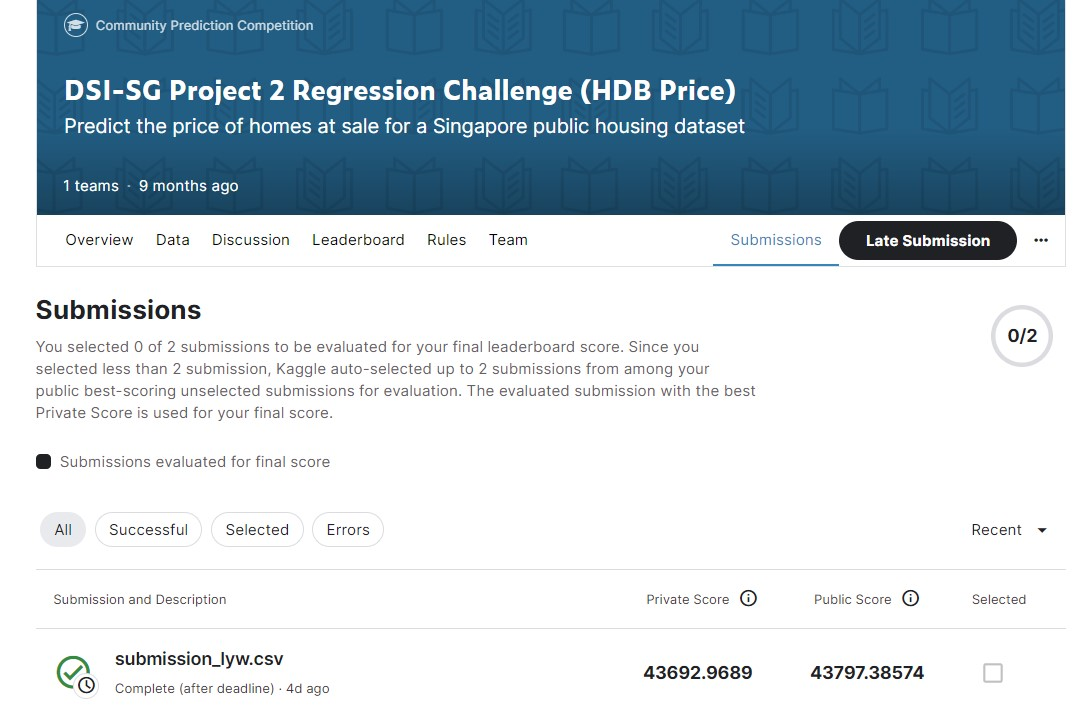

## 6. Conclusion and Recommendations

### Conclusion

Now that we have a model to predict HDB resale price, our users will be able to get a grasp of a fairer pricing as well as managing their expectaton of the HDB units better. The users will also have more bargaining power as a buyer or seller.

Model could account for ***90%*** of variability in HDB resale prices.

Using the Ridge model, we are able to evaluate property price fairly.

On average, our model predictions deviate from the true house prices by approximately +/-$40,000.

With the findings from:
#### * Top features that are positively correlated with sale price (Ridge modeling)
#### * Top features that are negatively correlated with sale price (Ridge modeling)

The features that contributing to higher HDB resale price are:


* floor_area_sqm: Holding all other features fixed, a 1 unit increase in the unit floor area (sqm) is associated with an increase of  ***$\$$77,177.***


* town_BEDOK: Holding all other features fixed, HDB located at Bedok is associated with an increase in house price of ***$\$$33,596.***


* mrt_name_Tiong Bahru: Holding all other features fixed, HDB located near Tiong Bahru MRT Station is associated with an increase in house price of ***$\$$25,837.***



* town_MARINE PARADE: Holding all other features fixed, HDB located at Marine Parade is associated with an increase in house price of ***$\$$19,202.***



* max_floor_lvl: Holding all other features fixed, a 1 unit increase in the maximum floor level of a HDB is associated with an increase of  ***$\$$18,290.***


</br>



On the contrary, the features that contributing to lower HDB resale price are age of HDB during transaction, distance of nearest mrt station, HDB located near Bedok Reservoir or Kaki Bukit MRT Station and HDB located at Bukit Batok.

### Recommendation

#### On the buyer standpoint:
If a buyer have a tight budget, the individual can opt for units that has smaller floor area, choosing locations such as Bukit Batok or having Bedok Reservoir or Kaki Bukit as the nearest MRT station. Or even, getting a unit with lower number of floor levels.

#### On the seller standpoint:
The recommendation is to sell the house as soon as possible once the Minimum Occupancy Period has ended to maximise the resale value of the HDB. But that also comes with units that are located at Marine Parade or Bedok or even having Tiong Bahru as the nearest MRT station.



## 7. Further Improvements

* To have better domain knowledge such as get consulted by subject matter experts (SME) to better deal with the outliers that were seen when performing the EDA and better understanding the importance of the features to further reduce any redundancy.

* To have better feature engineering by getting consulted by the SME.

* Introduce more features such as traveling time of flats from certain locations.

* Factoring on government policies into our analysis and data modelling.

### Refer to hdb_resale_price for presentation slides